In [549]:
# Importamos bibliotecas.

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [550]:
# Importamos los datasets que vamos a utilizar en este programa.

Migrantes = pd.read_csv("Tablas/Migrantes.csv")
Paises = pd.read_csv("Tablas/Paises.csv")
Regiones = pd.read_csv("Tablas/Regiones.csv")
Secciones = pd.read_csv("Tablas/Secciones.csv")
Sedes = pd.read_csv("Tablas/Sedes.csv")

In [551]:
# Crear una conexión SQLite en memoria.
Connection = sqlite3.connect(':memory:')

In [552]:
# Cargar dfs en la base de datos SQLite.
Migrantes.to_sql('Migrantes', Connection, index=False, if_exists='replace')
Paises.to_sql('Paises', Connection, index=False, if_exists='replace')
Regiones.to_sql('Regiones', Connection, index=False, if_exists='replace')
Secciones.to_sql('Secciones', Connection, index=False, if_exists='replace')
Sedes.to_sql('Sedes', Connection, index=False, if_exists='replace')

164

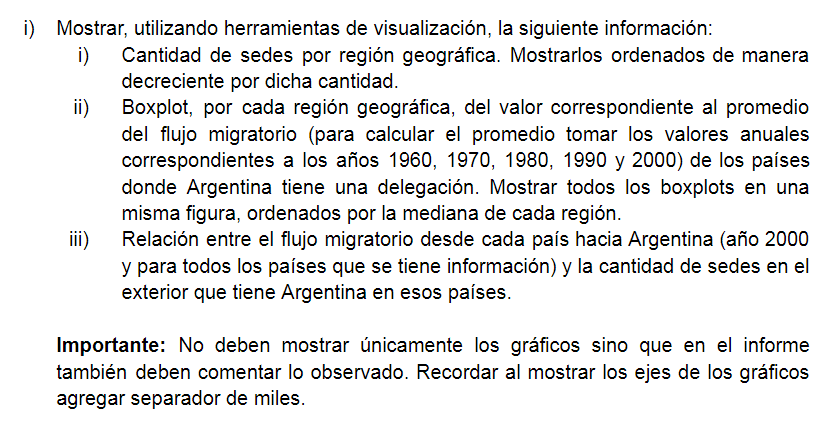

### __Punto i)__

In [553]:
Consulta_SQL = """
               SELECT R.nombre AS region,
                      COUNT(S.id_sede) AS cantidad_sedes
               FROM Paises AS P
               INNER JOIN Sedes AS S ON P.id = S.id_pais
               LEFT JOIN (
                            SELECT SC.id_sede, COUNT(SC.id_sede) AS cant_secciones
                            FROM Secciones AS SC
                            GROUP BY SC.id_sede
                         ) AS CS ON S.id_sede = CS.id_sede
               LEFT JOIN Regiones AS R ON P.id_region = R.id
               GROUP BY R.nombre
               ORDER BY cantidad_sedes DESC;
               
               """

Sedes_Por_Regiones = pd.read_sql_query(Consulta_SQL, Connection)
Sedes_Por_Regiones

,region,cantidad_sedes
0,AMÉRICA DEL SUR,45
1,EUROPA OCCIDENTAL,35
2,ASIA,30
3,AMÉRICA DEL NORTE,16
4,AMÉRICA CENTRAL Y CARIBE,14
5,ÁFRICA SUBSAHARIANA,8
6,EUROPA CENTRAL Y ORIENTAL,8
7,ÁFRICA DEL NORTE Y CERCANO ORIENTE,5
8,OCEANÍA,3


Damos formato "title" a la columna de nombres de regiones.

In [554]:
Sedes_Por_Regiones['region'] = Sedes_Por_Regiones['region'].apply(lambda x: x.title())

Damos un formato correcto a los conectores.

In [555]:
Sedes_Por_Regiones['region'] = Sedes_Por_Regiones['region'].apply(lambda x: x.replace(' Y ', ' y ') if ' Y ' in x else x)
Sedes_Por_Regiones['region'] = Sedes_Por_Regiones['region'].apply(lambda x: x.replace(' Del ', ' del ') if ' Del ' in x else x)

C:\Users\tomas\AppData\Local\Temp\ipykernel_10600\2664488323.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Graphic_1.set_xticklabels(Sedes_Por_Regiones['region'], rotation=90, ha='right')


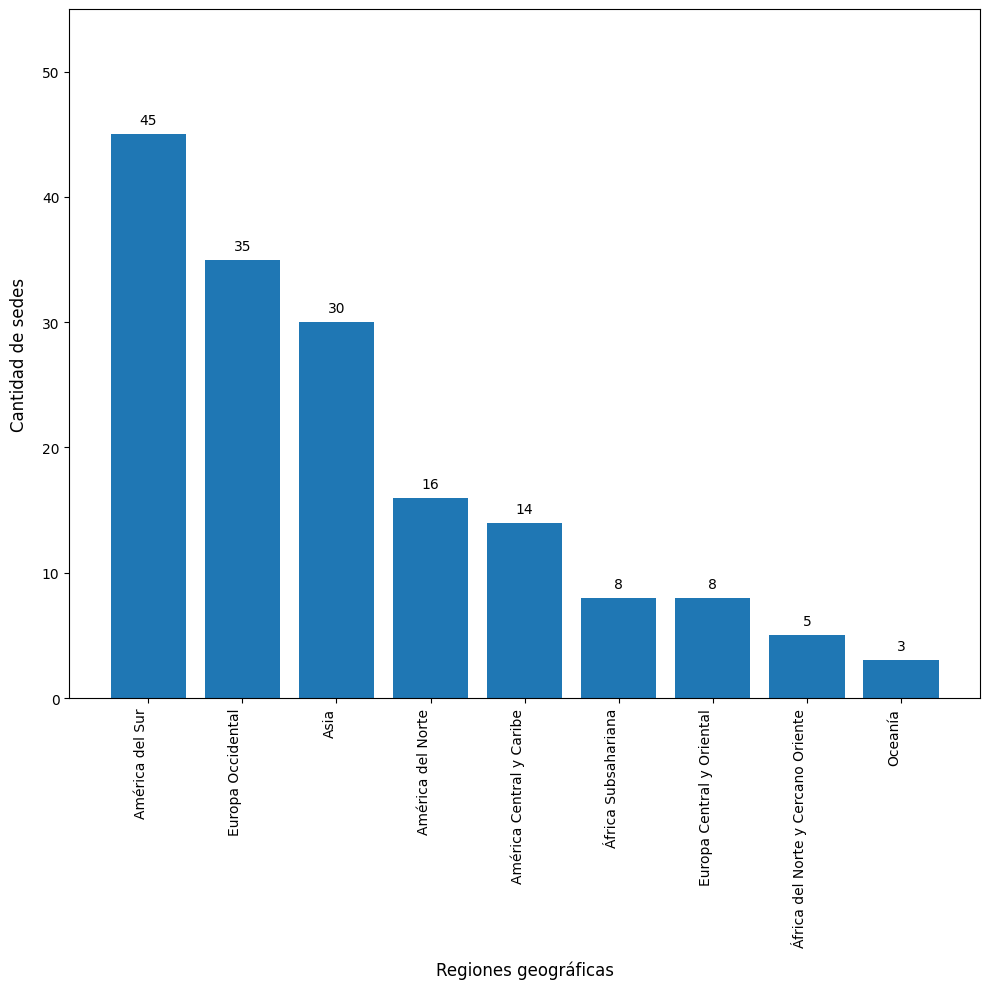

In [556]:
# Crear la figura y ajustar el tamaño.
Figure, Graphic_1 = plt.subplots(figsize=(10, 10))

# Ajustar la fuente global.
plt.rcParams['font.family'] = 'sans-serif'

# Dibujar el gráfico de barras.
Graphic_1.bar(Sedes_Por_Regiones['region'], Sedes_Por_Regiones['cantidad_sedes'])

# Título y etiquetas con mejor formato.
Graphic_1.set_xlabel('Regiones geográficas', fontsize=12, labelpad=10)
Graphic_1.set_ylabel('Cantidad de sedes', fontsize=12, labelpad=10)

# Establecer límite del eje Y dinámicamente.
Graphic_1.set_ylim(0, max(Sedes_Por_Regiones['cantidad_sedes']) + 10)

# Mostrar etiquetas de las barras con el valor exacto.
Graphic_1.bar_label(Graphic_1.containers[0], fontsize=10, padding=5)

# Rotar etiquetas del eje X.
Graphic_1.set_xticklabels(Sedes_Por_Regiones['region'], rotation=90, ha='right')

# Ajustar los márgenes para evitar que las etiquetas se corten.
plt.tight_layout()

# Mostrar el gráfico.
plt.show()

### __Punto ii)__

### __Punto iii)__

In [557]:
Consulta_SQL = """
               SELECT M.id_pais, M.inmigrantes, COUNT(S.id_sede) AS cantidad_sedes
               FROM Migrantes AS M
               LEFT JOIN Paises AS P ON M.id_pais = P.id
               INNER JOIN Sedes AS S ON M.id_pais = S.id_pais
               WHERE anio = 2000
               GROUP BY M.id_pais
               ORDER BY M.inmigrantes DESC
               
               """

Flujo_Migratorio_2000 = pd.read_sql_query(Consulta_SQL, Connection)
Flujo_Migratorio_2000.head(10)

,id_pais,inmigrantes,cantidad_sedes
0,PRY,331688.0,4
1,BOL,237213.0,7
2,ITA,224155.0,4
3,CHL,219104.0,7
4,ESP,137084.0,7
5,URY,119169.0,8
6,PER,91182.0,2
7,BRA,36424.0,11
8,POL,14469.0,1
9,DEU,10420.0,4


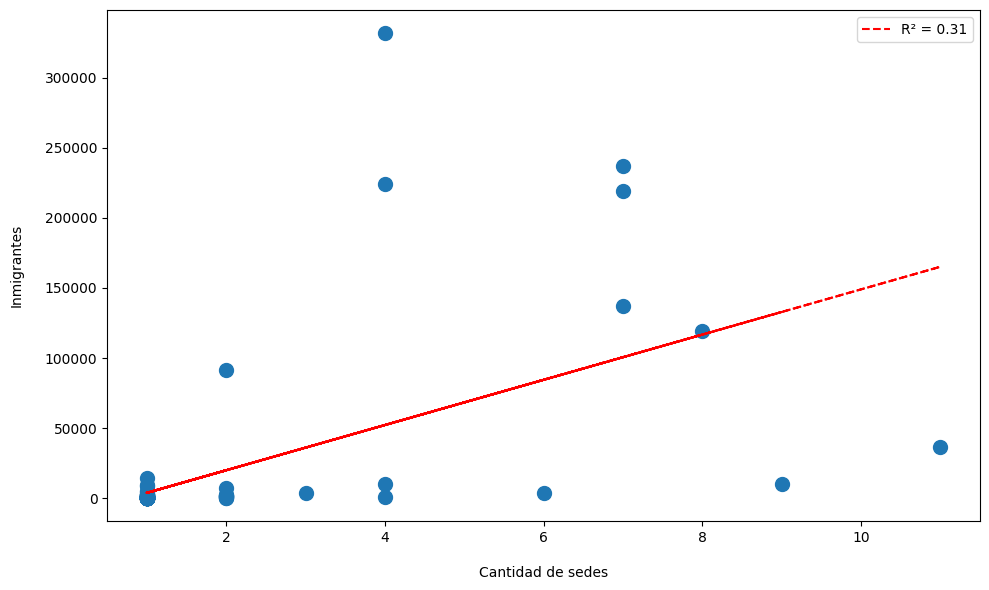

In [558]:
import numpy as np 

# Crear la figura y ajustar el tamaño.
Figure, Graphic_1 = plt.subplots(figsize=(10, 6))

plt.rcParams['font.family'] = 'sans-serif'

# Graficar los datos.
Graphic_1.plot('cantidad_sedes', 'inmigrantes', data=Flujo_Migratorio_2000, marker="o", linestyle='',
               markersize=10, label = '')

# Calcular la línea de tendencia (regresión lineal).
x = Flujo_Migratorio_2000['cantidad_sedes']
y = Flujo_Migratorio_2000['inmigrantes']
Slope, Intercept = np.polyfit(x, y, 1)
Trendline = Slope * x + Intercept

# Calcular R² (coeficiente de determinación).
Correlation_Matrix = np.corrcoef(x, y)
R_value = Correlation_Matrix[0, 1]**2  # R²

# Graficar la línea de tendencia.
Graphic_1.plot(x, Trendline, color='red', linestyle='--', label=f'R² = {R_value:.2f}')

# Etiquetas y título.
Graphic_1.set_ylabel('Inmigrantes', fontsize='medium', labelpad=15)
Graphic_1.set_xlabel('Cantidad de sedes', fontsize='medium', labelpad=15)

# Ajustar el diseño para evitar recortes.
plt.tight_layout()

# Mostrar leyenda.
Graphic_1.legend()

# Mostrar el gráfico.
plt.show()

##### Punto ii)

In [559]:
# Recolectamos países que tienen sedes.
Paises_Con_Sedes = list(Sedes['id_pais'].unique())

In [560]:
# Filtramos df Migrantes con los países que tienen sedes.
Migrantes_Con_Sedes = Migrantes[Migrantes['id_pais'].isin(Paises_Con_Sedes)]

Migrantes_Con_Sedes.loc[:, 'Flujo_Neto'] = Migrantes_Con_Sedes.loc[:, 'inmigrantes'] - Migrantes_Con_Sedes.loc[:, 'emigrantes']

C:\Users\tomas\AppData\Local\Temp\ipykernel_10600\2695443579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Migrantes_Con_Sedes.loc[:, 'Flujo_Neto'] = Migrantes_Con_Sedes.loc[:, 'inmigrantes'] - Migrantes_Con_Sedes.loc[:, 'emigrantes']


In [561]:

# Agrupar por país (región) y calcular el promedio del flujo neto
Migrantes_Con_Sedes = Migrantes_Con_Sedes.groupby('id_pais', as_index=False)['Flujo_Neto'].mean()

# Merge con el DataFrame original para incluir la columna de region
Migrantes_Con_Sedes = Migrantes_Con_Sedes.merge(Paises, how='left', left_on='id_pais', right_on='id')
Migrantes_Con_Sedes = Migrantes_Con_Sedes.merge(Regiones, how='left', left_on='id_region', right_on='id')

Migrantes_Con_Sedes = Migrantes_Con_Sedes[['nombre_y', 'id_pais', 'Flujo_Neto']]

Migrantes_Con_Sedes.rename(columns={'nombre_y': 'region'}, inplace=True)


In [562]:
# Eliminar datos que joden.
# Migrantes_Con_Sedes = Migrantes_Con_Sedes[Migrantes_Con_Sedes['id_pais'] != 'ITA']
# Migrantes_Con_Sedes = Migrantes_Con_Sedes[Migrantes_Con_Sedes['id_pais'] != 'ESP']

In [563]:
Migrantes_Con_Sedes['region'] = Migrantes_Con_Sedes['region'].apply(lambda x: x.title())
Migrantes_Con_Sedes['region'] = Migrantes_Con_Sedes['region'].apply(lambda x: x.replace(' Y ', ' y ') if ' Y ' in x else x)
Migrantes_Con_Sedes['region'] = Migrantes_Con_Sedes['region'].apply(lambda x: x.replace(' Del ', ' del ') if ' Del ' in x else x)

In [564]:
Migrantes_Con_Sedes[Migrantes_Con_Sedes['region'] == 'Europa Central y Oriental']

,region,id_pais,Flujo_Neto
8,Europa Central y Oriental,BGR,489.0
19,Europa Central y Oriental,CZE,6621.2
36,Europa Central y Oriental,HUN,2550.4
64,Europa Central y Oriental,POL,60264.4
69,Europa Central y Oriental,ROU,3475.4
70,Europa Central y Oriental,RUS,16757.6
75,Europa Central y Oriental,SRB,0.0
83,Europa Central y Oriental,UKR,8608.6


In [565]:
def Eliminar_Outliers(df: pd.DataFrame, Columna: str) -> pd.DataFrame:

    """
    Remove outliers from the DataFrame based on the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    Columna (str): The Columna from which to remove outliers.

    Returns:
    pd.DataFrame: DataFrame with outliers removed.

    """
    
    # Calcular Q1 y Q3.
    Q1 = df[Columna].quantile(0.25)
    Q3 = df[Columna].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartil.

    # Definir los límites para los outliers.
    Limite_Inferior = Q1 - 1.5 * IQR
    Limite_Superior = Q3 + 1.5 * IQR

    # Filtrar dataframe.
    df = df[(df[Columna] >= Limite_Inferior) & (df[Columna] <= Limite_Superior)]

    return df

# Filtrar outliers de flujo neto en Migrantes_Con_Sedes.
#Migrantes_Con_Sedes = Eliminar_Outliers(Migrantes_Con_Sedes, 'Flujo_Neto')

C:\Users\tomas\AppData\Local\Temp\ipykernel_10600\1303290055.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='Flujo_Neto', data=df_Regiones_Con_Mas_Flujo, ax=Graficos[0], order=Medianas_Mayor_Flujo, palette='Set2')
C:\Users\tomas\AppData\Local\Temp\ipykernel_10600\1303290055.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Graficos[0].set_xticklabels(Graficos[0].get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels
C:\Users\tomas\AppData\Local\Temp\ipykernel_10600\1303290055.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='Flujo_Neto', data=df_Regiones

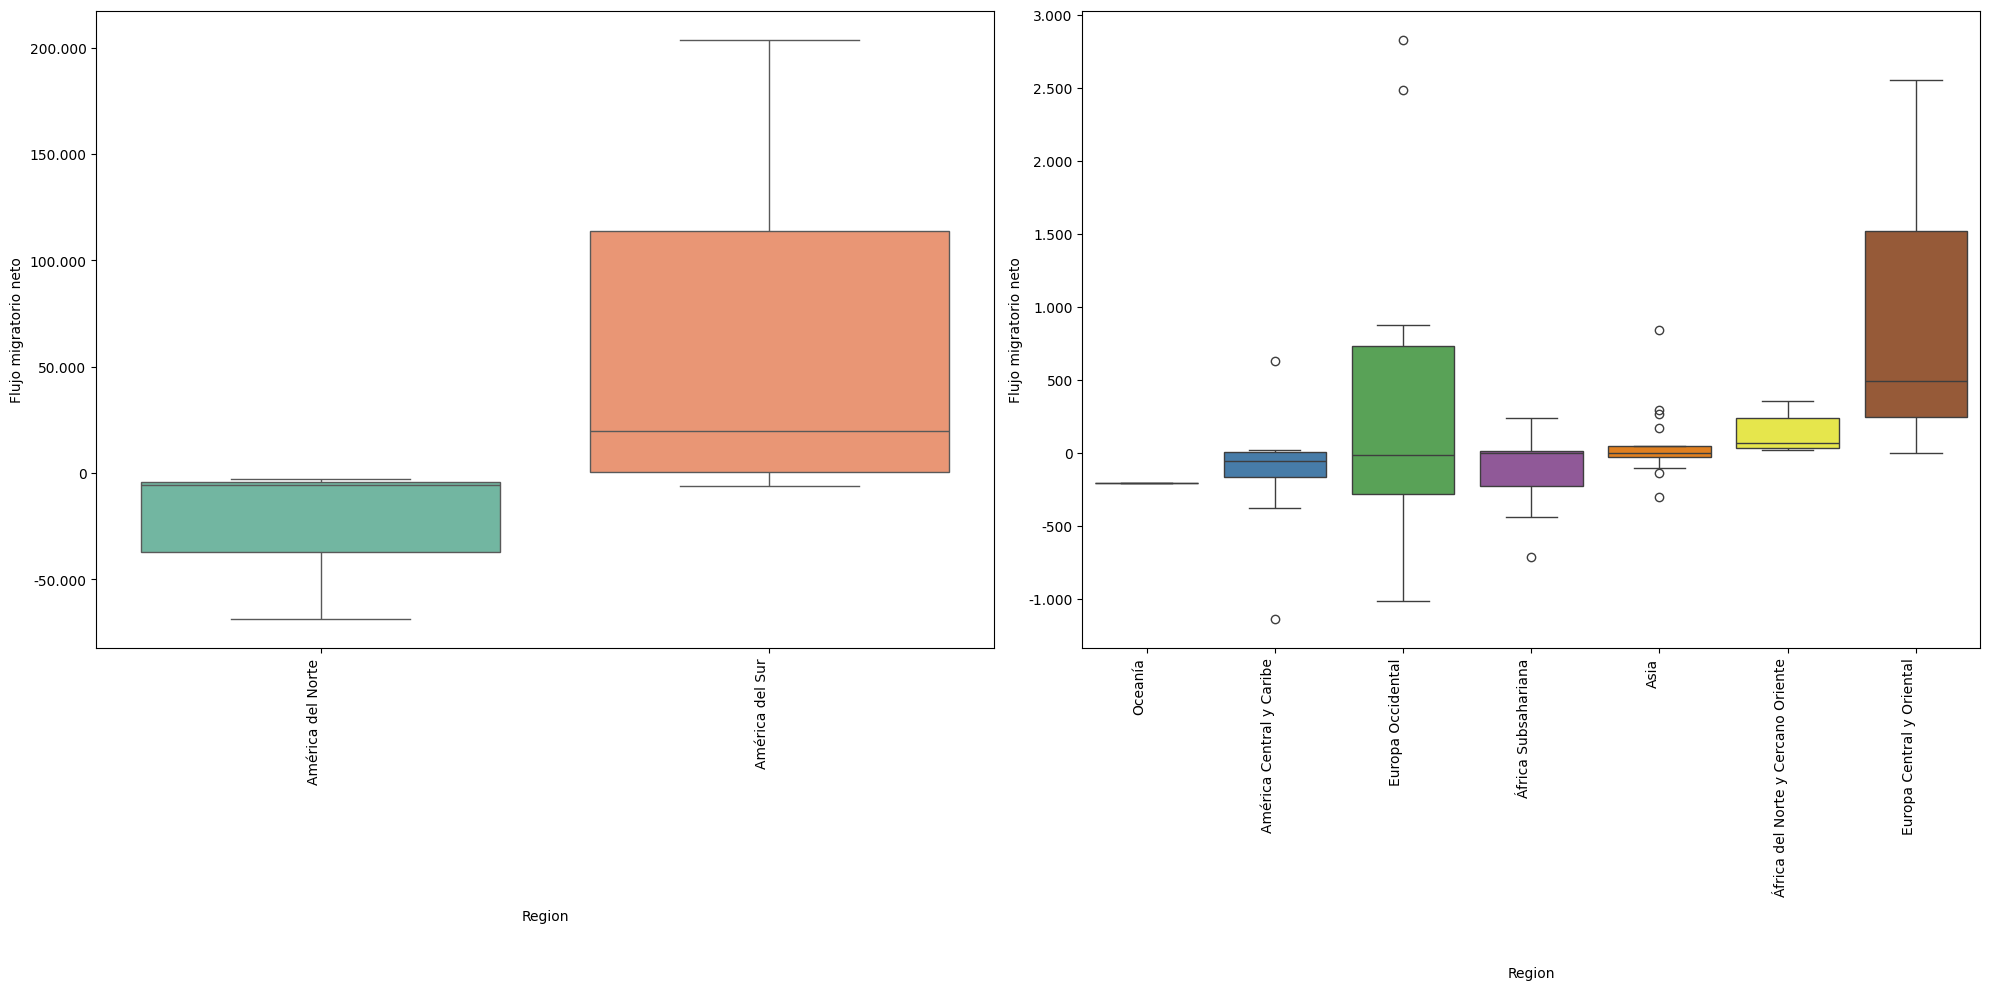

In [566]:
import seaborn as sns

# Definimos listas para separar los boxplots.
Regiones_Con_Mas_Flujo = ['América del Sur', 'América del Norte']
Regiones_Con_Menor_Flujo = [Region for Region in Migrantes_Con_Sedes['region'].unique() if Region not in Regiones_Con_Mas_Flujo]

# Crear DataFrames separados.
df_Regiones_Con_Mas_Flujo = Migrantes_Con_Sedes[Migrantes_Con_Sedes['region'].isin(Regiones_Con_Mas_Flujo)]
df_Regiones_Con_Menor_Flujo = Migrantes_Con_Sedes[Migrantes_Con_Sedes['region'].isin(Regiones_Con_Menor_Flujo)]

# Eliminamos outliers en las de menor flujo.
df_Regiones_Con_Menor_Flujo = Eliminar_Outliers(df_Regiones_Con_Menor_Flujo, 'Flujo_Neto')

# Obtener las Medianas_Mayor_Flujo para ordenar las regiones por Flujo_Neto
Medianas_Mayor_Flujo = df_Regiones_Con_Mas_Flujo.groupby('region')['Flujo_Neto'].median().sort_values().index.tolist()
Medianas_Menor_Flujo = df_Regiones_Con_Menor_Flujo.groupby('region')['Flujo_Neto'].median().sort_values().index.tolist()

# Set up the figure and Graficos for two panels
Figure, Graficos = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Crear el primer boxplot para regiones seleccionadas y ordenar por Medianas_Mayor_Flujo
sns.boxplot(x='region', y='Flujo_Neto', data=df_Regiones_Con_Mas_Flujo, ax=Graficos[0], order=Medianas_Mayor_Flujo, palette='Set2')
Graficos[0].set_xlabel('Region', labelpad = 90)
Graficos[0].set_ylabel('Flujo migratorio neto')
Graficos[0].set_xticklabels(Graficos[0].get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels
Graficos[0].grid(False) # Eliminar la cuadrícula
Graficos[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".") ))

# Crear el segundo boxplot para regiones de menor flujo y ordenar por Medianas_Mayor_Flujo
sns.boxplot(x='region', y='Flujo_Neto', data=df_Regiones_Con_Menor_Flujo, ax=Graficos[1], order=Medianas_Menor_Flujo, palette='Set1')
Graficos[1].set_xlabel('Region', labelpad = 50)
Graficos[1].set_ylabel('Flujo migratorio neto')
Graficos[1].set_xticklabels(Graficos[1].get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels
Graficos[1].grid(False)  # Eliminar la cuadrícula
Graficos[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".") ))
# Agregar separador de miles al eje Y.

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()